In [1]:
import math
from scipy import signal
from PIL import Image
import numpy as np
from numpy import *
from matplotlib import pyplot as plt
from pylab import *
import cv2
import random


In [2]:

def LK_OpticalFlow(Image1,Image2,):
    I1 = np.array(Image1)
    I2 = np.array(Image2)
    S = np.shape(I1)
    #applying Gaussian filter of size 3x3 to eliminate any noise
    I1_smooth = cv2.GaussianBlur(I1 #input image
								,(3,3)	#shape of the kernel
								,0      #lambda
								)
    I2_smooth = cv2.GaussianBlur(I2, (3,3), 0)
    '''
	let the filter in x-direction be Gx = 0.25*[[-1,1],[-1,1]]
	let the filter in y-direction be Gy = 0.25*[[-1,-1],[1,1]]
	let the filter in xy-direction be Gt = 0.25*[[1,1],[1, 1]]
	**1/4 = 0.25** for a 2x2 filter
	'''
		
	# First Derivative in X direction
    Ix = signal.convolve2d(I1_smooth,[[-0.25,0.25],[-0.25,0.25]],'same') + signal.convolve2d(I2_smooth,[[-0.25,0.25],[-0.25,0.25]],'same')
	# First Derivative in Y direction
    Iy = signal.convolve2d(I1_smooth,[[-0.25,-0.25],[0.25,0.25]],'same') + signal.convolve2d(I2_smooth,[[-0.25,-0.25],[0.25,0.25]],'same')
	# First Derivative in XY direction
    It = signal.convolve2d(I1_smooth,[[0.25,0.25],[0.25,0.25]],'same') + signal.convolve2d(I2_smooth,[[-0.25,-0.25],[-0.25,-0.25]],'same')
	
	# finding the good features
    features = cv2.goodFeaturesToTrack(I1_smooth # Input image
	,10000 # max corners
	,0.01 # lambda 1 (quality)
	,10 # lambda 2 (quality)
	)
    feature = np.int0(features)
    plt.subplot(1,3,1)
    plt.title('Frame 1')
    plt.imshow(I1_smooth, cmap = cm.gray)
    plt.subplot(1,3,2)
    plt.title('Frame 2')
    plt.imshow(I2_smooth, cmap = cm.gray)#plotting the features in frame1 and plotting over the same
    for i in feature:
        x,y = i.ravel()
        cv2.circle(I1_smooth #input image
            ,(x,y) 			 #centre
			,3 				 #radius
			,0 			 #color of the circle
			,-1 			 #thickness of the outline
			)
	#creating the u and v vector
    u = v = np.nan*np.ones(S)
    # Calculating the u and v arrays for the good features obtained n the previous step.
    for l in feature:
        j,i = l.ravel()
		# calculating the derivatives for the neighbouring pixels
		# since we are using  a 3*3 window, we have 9 elements for each derivative.
        IX = ([Ix[i-1,j-1],Ix[i,j-1],Ix[i-1,j-1],Ix[i-1,j],Ix[i,j],Ix[i+1,j],Ix[i-1,j+1],Ix[i,j+1],Ix[i+1,j-1]]) #The x-component of the gradient vector
        IY = ([Iy[i-1,j-1],Iy[i,j-1],Iy[i-1,j-1],Iy[i-1,j],Iy[i,j],Iy[i+1,j],Iy[i-1,j+1],Iy[i,j+1],Iy[i+1,j-1]]) #The Y-component of the gradient vector
        IT = ([It[i-1,j-1],It[i,j-1],It[i-1,j-1],It[i-1,j],It[i,j],It[i+1,j],It[i-1,j+1],It[i,j+1],It[i+1,j-1]]) #The XY-component of the gradient vector
		# Using the minimum least squares solution approach
        LK = (IX, IY)
        LK = np.matrix(LK)
        LK_T = np.array(np.matrix(LK)) # transpose of A
        LK = np.array(np.matrix.transpose(LK)) 
        
        A1 = np.dot(LK_T,LK) #Psedudo Inverse
        A2 = np.linalg.pinv(A1)
        A3 = np.dot(A2,LK_T)
        (u[i,j],v[i,j]) = np.dot(A3,IT) # we have the vectors with minimized square error

	
    colors = "bgrcmykw"
    color_index = random.randrange(0,8)
    c=colors[color_index]
	#======= Plotting the vectors on the image========
    plt.subplot(1,3,3)
    plt.title('Vector plot of Optical Flow of good features')
    plt.imshow(I1,cmap = cm.gray)
    for i in range(S[0]):
        for j in range(S[1]):
            if abs(u[i,j])>t or abs(v[i,j])>t: # setting the threshold to plot the vectors
                plt.arrow(j,i,v[i,j],u[i,j],head_width = 5, head_length = 5, color = c)
    
    plt.show()


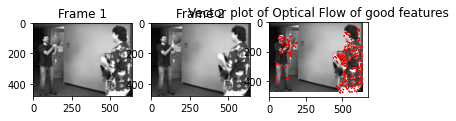

In [3]:
t = 0.3 # choose threshold value
#import the images
Image1 = Image.open('basketball1.png').convert('L')
Image2 = Image.open('basketball2.png').convert('L')
LK_OpticalFlow(Image1, Image2)